# Using CLIP for text-image similarity

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from transformers import CLIPProcessor, CLIPModel

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
device

'cuda'

In [6]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32", use_fast=True)

In [7]:
image = Image.open("cats.jpg").convert("RGB")

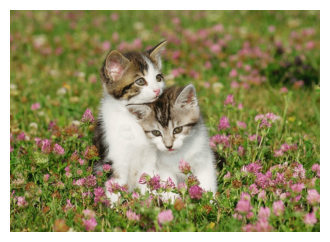

In [25]:
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.axis('off')
plt.show()

In [41]:
texts = ["a dog in the park",
         "two cats in the flowers",
         "a modern office with computers",
         "two kittens in the park"]

In [42]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True).to(device)

In [43]:
outputs = model(**inputs)

In [44]:
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [45]:
probs

tensor([[2.5072e-07, 9.3118e-01, 2.9201e-10, 6.8824e-02]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)